<a href="https://colab.research.google.com/github/heavyrotary/machineLearning/blob/main/Dicoding/imageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# personal data
print("Nama: Yusak Doni Yudanto")
print("Email: inside.yusak@gmail.com")


Nama: Yusak Doni Yudanto
Email: inside.yusak@gmail.com


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models, optimizers, callbacks
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image
from google.colab import files

In [ ]:

!wget -q https://github.com/dicodingacademy/assets/releases/download/release/rockpaperscissors.zip
!unzip -qq rockpaperscissors.zip


base_dir = 'rockpaperscissors/rps-cv-images'

In [ ]:
# Set image augmentation for training and validation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.4  # 40% untuk validasi
)

# Create a generator for training
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'  # Determine the subset for training
)

# Create a generator for validation
validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'  # Define a subset for validation
)


Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [ ]:
# Using VGG16 pretrained model for feature extraction
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
base_model.trainable = False

# Added a custom layer on top of VGG16
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),  # Reducing the number of units
    layers.Dropout(0.5),
    layers.Dense(3, activation='softmax')
])

model.compile(
    loss='categorical_crossentropy',
    optimizer=optimizers.Adam(learning_rate=1e-4),  # Set the learning rate
    metrics=['accuracy']
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_2 (Dense)             (None, 256)               2097408   
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 3)                 771       
                                                                 
Total params: 16812867 (64.14 MB)
Trainable params: 2098179 (8.00 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [ ]:
# Set the learning rate
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=15,
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    callbacks=[early_stopping],
    verbose=2
)


Epoch 1/15
42/42 - 34s - loss: 0.6749 - accuracy: 0.7116 - val_loss: 0.2907 - val_accuracy: 0.9233 - 34s/epoch - 808ms/step
Epoch 2/15
42/42 - 21s - loss: 0.2492 - accuracy: 0.9292 - val_loss: 0.1666 - val_accuracy: 0.9577 - 21s/epoch - 489ms/step
Epoch 3/15
42/42 - 21s - loss: 0.1889 - accuracy: 0.9460 - val_loss: 0.1190 - val_accuracy: 0.9691 - 21s/epoch - 491ms/step
Epoch 4/15
42/42 - 20s - loss: 0.1435 - accuracy: 0.9490 - val_loss: 0.1199 - val_accuracy: 0.9634 - 20s/epoch - 482ms/step
Epoch 5/15
42/42 - 19s - loss: 0.1379 - accuracy: 0.9566 - val_loss: 0.0932 - val_accuracy: 0.9748 - 19s/epoch - 454ms/step
Epoch 6/15
42/42 - 20s - loss: 0.1134 - accuracy: 0.9680 - val_loss: 0.0709 - val_accuracy: 0.9817 - 20s/epoch - 480ms/step
Epoch 7/15
42/42 - 19s - loss: 0.0948 - accuracy: 0.9711 - val_loss: 0.0748 - val_accuracy: 0.9794 - 19s/epoch - 459ms/step
Epoch 8/15
42/42 - 21s - loss: 0.0911 - accuracy: 0.9650 - val_loss: 0.0652 - val_accuracy: 0.9794 - 21s/epoch - 489ms/step
Epoch 9/

In [ ]:
# Evaluate models
val_loss, val_acc = model.evaluate(validation_generator)
print(f"Akurasi Model: {val_acc * 100:.2f}%")


28/28 [==============================] - 9s 324ms/step - loss: 0.0464 - accuracy: 0.9851
Akurasi Model: 98.51%


Saving 1i1dlQrE6JnhYXE4.png to 1i1dlQrE6JnhYXE4.png
1/1 [==============================] - 1s 1s/step


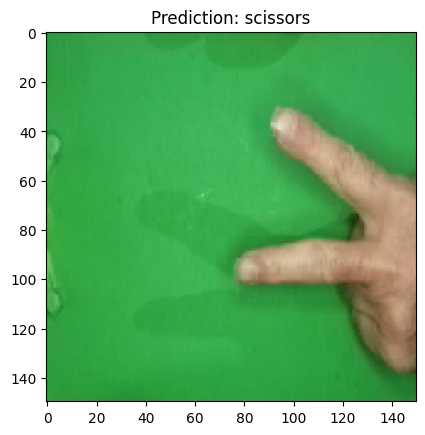

In [ ]:
# Function to predict images
def predict_image(img_path):
    img = image.load_img(img_path, target_size=(150, 150))
    img_tensor = image.img_to_array(img)
    img_tensor = np.expand_dims(img_tensor, axis=0)
    img_tensor /= 255.

    prediction = model.predict(img_tensor)
    pred_class = np.argmax(prediction[0])
    class_names = ['rock', 'paper', 'scissors']

    plt.imshow(img)
    plt.title(f'Prediction: {class_names[pred_class]}')
    plt.show()

# Uploading images to predict
uploaded = files.upload()

for img_path in uploaded.keys():
    predict_image(img_path)